# Project 1 team 11.
---

### Team members

- Dylan Kelly
- Melissa Wegrzyn
- Sree Rana Pavan Vannemsetti
- Shengnan Ma
 

In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
%matplotlib inline

# Path to CSV
life_expectency_path = Path("Resources/Life_Expectancy_Data_PRJ1.csv")

# Read CSV
life_expectancy = pd.read_csv(life_expectency_path)

life_expectancy

# Life Expectancy Summary

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,Zimbabwe,2004,Developing,67,69,62,85,27,4.36,0.000000,...,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.2
2863,Zimbabwe,2003,Developing,62,75,96,61,26,4.06,0.000000,...,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.5
2864,Zimbabwe,2002,Developing,50,74,55,95,25,4.43,0.000000,...,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,10.0
2865,Zimbabwe,2001,Developing,66,66,74,78,25,1.72,0.000000,...,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,9.8


In [2]:
# Test the number of countries in dataset
country_count = len(life_expectancy["Country"].unique())
country_count

182

In [3]:
# Clean Dataset
# Identify duplicates entries for years
dup_data = life_expectancy.loc[life_expectancy.duplicated(["Country","Year"])]
dup_data["Country"].unique()
# No RESULT!

array([], dtype=object)

In [4]:
# Identify countries containing less than 16 years of Data
life_expectancy.Country.drop_duplicates(keep = False).sum
# Three countries found

<bound method NDFrame._add_numeric_operations.<locals>.sum of 752     Dominica
1937       Palau
2642      Tuvalu
Name: Country, dtype: object>

In [5]:
# Clean Dataframe for use in charts
life_expectancy_clean = life_expectancy.drop(labels=[752,1937,2642], axis=0)
life_expectancy_clean

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,Zimbabwe,2004,Developing,67,69,62,85,27,4.36,0.000000,...,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.2
2863,Zimbabwe,2003,Developing,62,75,96,61,26,4.06,0.000000,...,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.5
2864,Zimbabwe,2002,Developing,50,74,55,95,25,4.43,0.000000,...,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,10.0
2865,Zimbabwe,2001,Developing,66,66,74,78,25,1.72,0.000000,...,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,9.8


In [6]:
# Confirm number of countries in cleaned dataset
country_count_clean = len(life_expectancy_clean["Country"].unique())
country_count_clean

179

In [7]:
# Add two new summary columns to data
#Combined adult mortality
life_expectancy_clean['Adult Mortality'] =life_expectancy_clean['Adult Mortality (men)']/2 + life_expectancy_clean['Adult Mortality (women)']/2
# Combine life expectancy
life_expectancy_clean['Life Expectancy'] =life_expectancy_clean['Life expectancy (men)']/2 + life_expectancy_clean['Life expectancy(women)']/2

life_expectancy_clean.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling,Adult Mortality,Life Expectancy
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1,66.0,68.0
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0,79.0,63.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9,77.0,65.0
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8,77.0,73.0
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5,64.5,75.5


In [8]:
#Group by country summary

#average adult mortality(men)
avg_adult_mortality_men = life_expectancy_clean.groupby(["Country"])["Life expectancy (men)"].mean()

#average adult mortality(women)
avg_adult_mortality_women = life_expectancy_clean.groupby(["Country"])["Life expectancy(women)"].mean()

#average adult mortality
avg_adult_mortality = life_expectancy_clean.groupby(["Country"])["Life Expectancy"].mean()

#average life expectancy(men)
avg_life_expectancy_men = life_expectancy_clean.groupby(["Country"])["Adult Mortality (men)"].mean()

#average life expectancy (women)
avg_life_expectancy_women = life_expectancy_clean.groupby(["Country"])["Adult Mortality (women)"].mean()

#average life expectancy
avg_life_expectancy = life_expectancy_clean.groupby(["Country"])["Adult Mortality"].mean()

#average alcohol consumption
avg_alcohol = life_expectancy_clean.groupby(["Country"])["Alcohol"].mean()

#average BMI
avg_bmi = life_expectancy_clean.groupby(["Country"])["BMI"].mean()

#DataFrame for part 1
part_one_df = pd.DataFrame({"Average Adult Mortality Men":avg_adult_mortality_men,
                            "Average Adult Mortality Women":avg_adult_mortality_women,
                            "Average Adult Mortality": avg_adult_mortality,
                            "Average Life Expectancy Men": avg_life_expectancy_men,
                            "Average Life Expectancy Women": avg_life_expectancy_women,
                            "Average Life Expectancy":avg_life_expectancy,
                            "Average Alcohol Consumption": avg_alcohol,
                            "Average BMI": avg_bmi
                           })
part_one_df

,Average Adult Mortality Men,Average Adult Mortality Women,Average Adult Mortality,Average Life Expectancy Men,Average Life Expectancy Women,Average Life Expectancy,Average Alcohol Consumption,Average BMI
Country,,,,,,,,
Afghanistan,66.0625,65.2500,65.65625,80.4375,77.3125,78.87500,0.014375,15.51875
Albania,64.7500,67.5625,66.15625,70.8125,74.7500,72.78125,4.848750,49.06875
Algeria,64.5000,66.6250,65.56250,80.9375,67.9375,74.43750,0.406667,48.74375
Angola,70.6250,67.0625,68.84375,68.2500,76.3750,72.31250,5.740667,18.01875
Antigua and Barbuda,66.3125,71.3750,68.84375,67.4375,79.6875,73.56250,7.949333,38.42500
...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),65.7500,70.0000,67.87500,71.7500,73.2500,72.50000,7.420000,54.48750
Viet Nam,67.3750,68.8750,68.12500,74.5625,76.5625,75.56250,3.087333,11.18750
Yemen,62.3125,67.6250,64.96875,70.6250,76.9375,73.78125,0.047333,33.48750


In [9]:
# Find Top 5 Countries with the Lowest Average Life Expectancy 

bottom_expectancy = part_one_df.sort_values("Average Life Expectancy", ascending = True)
bottom_expectancy.head(5)

,Average Adult Mortality Men,Average Adult Mortality Women,Average Adult Mortality,Average Life Expectancy Men,Average Life Expectancy Women,Average Life Expectancy,Average Alcohol Consumption,Average BMI
Country,,,,,,,,
Burundi,69.1875,66.8125,68.00000,68.0625,63.7500,65.90625,4.103333,15.31250
Dominican Republic,68.0000,69.6250,68.81250,65.3750,69.1875,67.28125,6.030667,48.14375
Belize,68.0000,70.4375,69.21875,67.8750,69.0625,68.46875,6.252667,37.67500
Congo,72.6250,70.2500,71.43750,65.9375,71.9375,68.93750,2.173333,20.92500
Mongolia,66.3125,64.5625,65.43750,69.8125,68.3125,69.06250,2.354000,39.79375


In [10]:
# Find Top 5 Counrtries for the Highest Life Expectancy 

top_expectancy = part_one_df.sort_values("Average Life Expectancy", ascending = False)
top_expectancy.head(5)

,Average Adult Mortality Men,Average Adult Mortality Women,Average Adult Mortality,Average Life Expectancy Men,Average Life Expectancy Women,Average Life Expectancy,Average Alcohol Consumption,Average BMI
Country,,,,,,,,
Austria,69.1250,72.2500,70.68750,81.0000,80.3750,80.68750,12.236000,48.28750
Croatia,68.2500,65.3750,66.81250,82.8750,78.0625,80.46875,12.448000,52.35625
Slovakia,69.0000,66.6875,67.84375,82.0625,78.1250,80.09375,10.473333,51.81875
Bosnia and Herzegovina,69.0625,70.9375,70.00000,78.1875,81.3750,79.78125,4.405333,48.96250
Saudi Arabia,68.6250,65.6250,67.12500,80.7500,78.3750,79.56250,0.074667,55.31250


In [11]:
# Find Top 5 Countries with Highest Adult Mortality Age

top_mortality = part_one_df.sort_values("Average Adult Mortality", ascending = False)
top_mortality.head(5)

,Average Adult Mortality Men,Average Adult Mortality Women,Average Adult Mortality,Average Life Expectancy Men,Average Life Expectancy Women,Average Life Expectancy,Average Alcohol Consumption,Average BMI
Country,,,,,,,,
Lebanon,71.3125,72.6875,72.00000,77.6250,72.1250,74.87500,1.785333,55.33750
Congo,72.6250,70.2500,71.43750,65.9375,71.9375,68.93750,2.173333,20.92500
Estonia,70.3750,71.8125,71.09375,79.1875,74.0000,76.59375,9.014667,56.68125
Ukraine,72.0000,70.0625,71.03125,76.7500,78.1875,77.46875,7.369333,50.89375
Malaysia,71.5625,70.1250,70.84375,73.7500,72.0000,72.87500,0.490667,29.16875


In [12]:
# Find Top 5 Countries with Lowest Adult Mortality Age

bottom_mortality = part_one_df.sort_values("Average Adult Mortality", ascending = True)
bottom_mortality.head(5)

,Average Adult Mortality Men,Average Adult Mortality Women,Average Adult Mortality,Average Life Expectancy Men,Average Life Expectancy Women,Average Life Expectancy,Average Alcohol Consumption,Average BMI
Country,,,,,,,,
Norway,62.5625,64.6875,63.62500,75.4375,75.8125,75.62500,6.234375,50.81250
Malta,64.5000,62.7500,63.62500,71.6875,72.6875,72.18750,7.130000,66.18125
Bahrain,66.2500,62.0000,64.12500,73.0000,71.5000,72.25000,1.934667,51.65625
Malawi,62.1250,66.6875,64.40625,74.5625,71.5000,73.03125,0.919333,16.78125
Mozambique,64.5625,64.5625,64.56250,67.5625,77.4375,72.50000,1.266000,16.14375


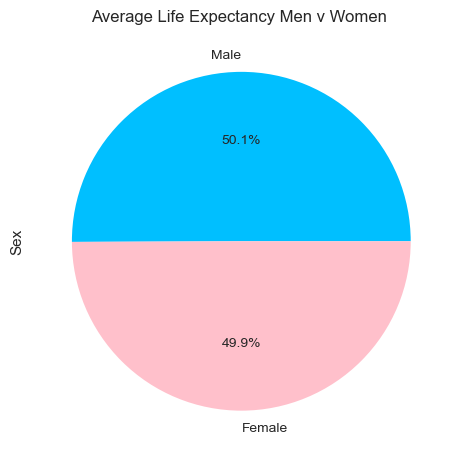

In [48]:
# Average Life Expectancy Male v Female Globally (2000 -2015)

avg_Women_lf = part_one_df["Average Life Expectancy Women"].mean()
avg_men_lf = part_one_df["Average Life Expectancy Men"].mean()

labels = ["Male","Female"]
value = [avg_men_lf, avg_Women_lf]
gender_colours = ["deepskyblue","pink"]

plt.pie(value,labels = labels,colors=gender_colours,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Average Life Expectancy Men v Women ")
plt.show()

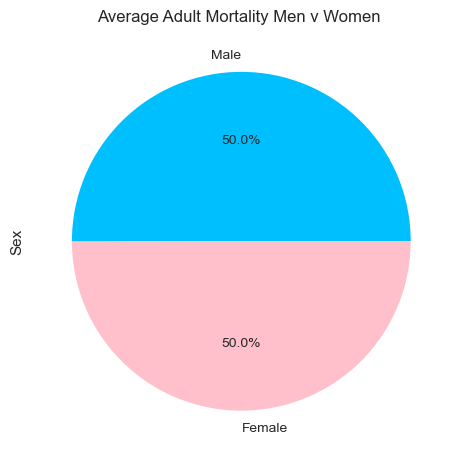

In [49]:
# Average Adult Mortality Male v Female Globalley (2000 - 2015)

avg_Women_am = part_one_df["Average Adult Mortality Women"].mean()
avg_men_am = part_one_df["Average Adult Mortality Men"].mean()

labels = ["Male","Female"]
value = [avg_men_am,avg_Women_am]
gender_colours = ["deepskyblue","pink"]

plt.pie(value,labels = labels,colors=gender_colours,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Average Adult Mortality Men v Women ")
plt.show()

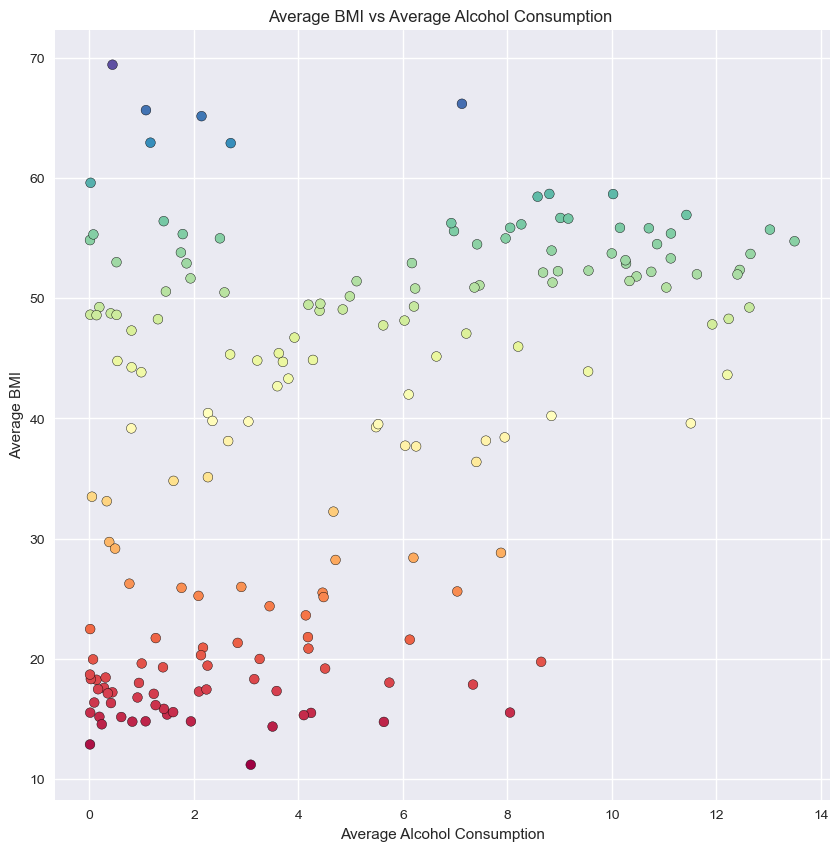

In [79]:
# Alcohol v BMI

alch = part_one_df["Average Alcohol Consumption"]
bmi = part_one_df["Average BMI"]

plt.scatter(alch,bmi,c= bmi,cmap = 'Spectral', edgecolor='black')
plt.ylabel("Average BMI")
plt.xlabel("Average Alcohol Consumption")
plt.title("Average BMI vs Average Alcohol Consumption ")
plt.show()

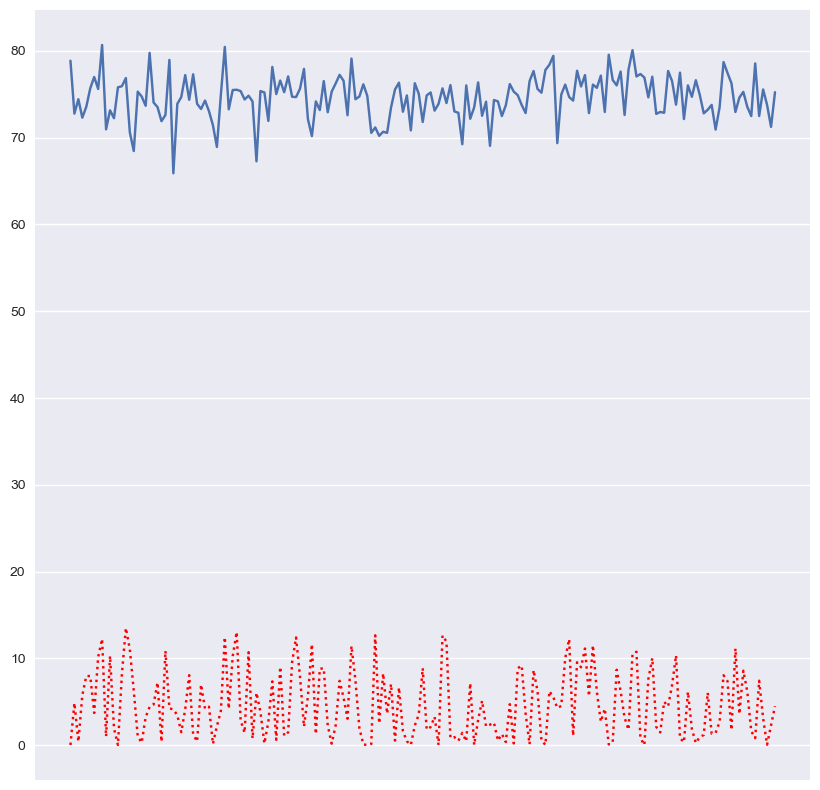

In [80]:
# Alcohol Consumption vs Life Expectancy
alch = part_one_df["Average Alcohol Consumption"]
bmi = part_one_df["Average BMI"]
life_exp = part_one_df["Average Life Expectancy"]

plt.plot(life_exp)
plt.plot(alch, color= "red",linestyle =':')
plt.xticks([])
plt.show()